# Topic Modelling
To extract different topic from the text
Unsupervised techniques 

# Latent Semantic Analysis
Same word can have different meaning based on the use of word in the sentence. So, we need to care for the context 
around the word to get the meaning. This is where LSA comes into play.
https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [2]:
from sklearn.datasets import fetch_20newsgroups
dataset=fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers','footers','quotes'))
documents=dataset.data
len(documents)

11314

In [3]:
# The dataset has 11,314 text documents distributed across 20 different newsgroups.
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
type(documents), len(documents)

(list, 11314)

In [5]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [6]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [7]:
news_df=pd.DataFrame({'document':documents})

# Remove everything except alphabets
news_df['clean_doc']=news_df['document'].str.replace("[^A-Za-z#]", " ")

# Removing short words
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all lower case
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: x.lower())

In [8]:
import nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

# Tokenization
tokenized_doc=news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc=tokenized_doc.apply(lambda x:[item for item in x if item not in stop_words])

In [9]:
type(tokenized_doc)

pandas.core.series.Series

In [10]:
tokenized_doc[1]

['yeah',
 'expect',
 'people',
 'read',
 'actually',
 'accept',
 'hard',
 'atheism',
 'need',
 'little',
 'leap',
 'faith',
 'jimmy',
 'logic',
 'runs',
 'steam',
 'sorry',
 'pity',
 'sorry',
 'feelings',
 'denial',
 'faith',
 'need',
 'well',
 'pretend',
 'happily',
 'ever',
 'anyway',
 'maybe',
 'start',
 'newsgroup',
 'atheist',
 'hard',
 'bummin',
 'much',
 'forget',
 'flintstone',
 'chewables',
 'bake',
 'timmons']

In [11]:
detokenized_doc=[]
for i in range(len(news_df)):
    t=' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
news_df['clean_doc']=detokenized_doc
news_df.head(10)

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgrou...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize principle strongest points would still like know question sort arab countries want continue think tank charade fixation israel must stop might start asking sort questions arab cou...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss proposal much change last product area priced suspect clipper phones came customer automatically preregistered government authorities thus aside attempting legitimi...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well change scoring playoff pool unfortunately time right certainly post scoring rules tomorrow matter enter anyway good keith keller rangers quakers kkeller mail upenn league champs
5,"\n \nI read somewhere, I think in Morton Smith's _Jesus the Magician_, that\nold Lazarus wasn't dead, but going in the tomb was part of an initiation\nrite for a magi-cult, of which Jesus was als...",read somewhere think morton smith jesus magician lazarus dead going tomb part initiation rite magi cult jesus also part appears stay normal wonder
6,\nOk. I have a record that shows a IIsi with and without a 64KB cache.\nIt's small enough that I will attach it.\n\nI have also measured some real programs with and without the 64 KB\ncache. The...,record shows iisi without cache small enough attach also measured real programs without cache speedup varies ranging think average right subjective difference great sometimes noticable simple cach...
7,\n\n\nSounds like wishful guessing.\n\n\n\n\n'So-called' ? What do you mean ? How would you see the peace process?\n\nSo you say palestineans do not negociate because of 'well-founded' predictions...,sounds like wishful guessing called mean would peace process palestineans negociate well founded predictions know well founded test table months prove anything always side fault right know palesti...
8,Nobody is saying that you shouldn't be allowed to use msg. Just\ndon't force it on others. If you have food that you want to \nenhance with msg just put the MSG on the table like salt. It is\nt...,nobody saying allowed force others food want enhance table like salt option eater make commerical product leave include packet like salt packets desire salt pepper mustard ketchup pickles table op...
9,"\n I was wondering if anyone can shed any light on just how it is that these\nelectronic odometers remember the total elapsed mileage? What kind of\nmemory is stable/reliable enough, non-volatil...",wondering anyone shed light electronic odometers remember total elapsed mileage kind memory stable reliable enough volatile enough independent enough outside battery power last years life vehicle ...


In [12]:
# Document Term Matrix
# Using TfidfVectorizer to create a document-term matrix with 1,000 terms.
# Using all the terms instead of only 1000 will require large computational expenses

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english', max_features=1000,max_df=0.5, smooth_idf=True) # keep top 1000 terms
x=vectorizer.fit_transform(news_df['clean_doc'])
x.shape

(11314, 1000)

In [13]:
# Use document-term matrix and decompose it into multiple metrices using TruncatedSVD

from sklearn.decomposition import TruncatedSVD

# SVD Represent documnets and terms in vectors
svd_model=TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(x)
len(svd_model.components_)

20

In [14]:
# svd_model gives us different topics for the text and can be accessed using svd_model.components_

terms=vectorizer.get_feature_names()
print(terms)
print("\n")
print(len(terms))

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration', 'advance', 'advice', 'agencies', 'agree', 'algorithm', 'allow', 'allowed', 'allows', 'amendment', 'america', 'american', 'americans', 'analysis', 'angeles', 'anonymous', 'answer', 'answers', 'anti', 'anybody', 'apparently', 'appear', 'appears', 'apple', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'approach', 'appropriate', 'april', 'arab', 'archive', 'area', 'areas', 'argument', 'arguments', 'armenia', 'armenian', 'armenians', 'arms', 'army', 'article', 'articles', 'asked', 'asking', 'assume', 'assuming', 'atheism', 'atheists', 'attack', 'attempt', 'author', 'authority', 'available', 'average', 'avoid', 'away', 'background', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'begin', 'beginning', 'belief', 'beliefs', 'believe', 'best', 'better', 'bible', 'bike', 'bios', 'bits', 'black

In [15]:
for i, comp in enumerate(svd_model.components_):
    terms_comp=zip(terms,comp)

    
    sorted_terms=sorted(terms_comp,key=lambda x:x[1],reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=" ")
    print("\n")

Topic 0: 
like know people think good time thanks 

Topic 1: 
thanks windows card drive mail file advance 

Topic 2: 
game team year games season players good 

Topic 3: 
drive scsi disk hard card drives problem 

Topic 4: 
windows file window files program using problem 

Topic 5: 
government chip mail space information encryption data 

Topic 6: 
like bike know chip sounds looks look 

Topic 7: 
card sale video offer monitor price jesus 

Topic 8: 
know card chip video government people clipper 

Topic 9: 
good know time bike jesus problem work 

Topic 10: 
think chip good thanks clipper need encryption 

Topic 11: 
thanks right problem good bike time window 

Topic 12: 
good people windows know file sale files 

Topic 13: 
space think know nasa problem year israel 

Topic 14: 
space good card people time nasa thanks 

Topic 15: 
people problem window time game want bike 

Topic 16: 
time bike right windows file need really 

Topic 17: 
time problem file think israel long mail 

Topi

# Topic Visualization
PCA and t-SNE can help us to visualize high dimension data into lower dimensions. 
Here, we will use UMAP(Uniform manifold approximation and projection)

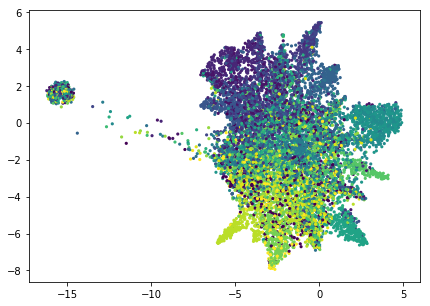

In [16]:
import umap.umap_ as umap
x_topics=svd_model.fit_transform(x)
embedding=umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(x_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dataset.target, s=10, edgecolor='none')
plt.show()

In above plot, each dot represent a document and the color represent the 20 newsgroups. Our LSA model did a good job.